# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'assets/data/train.p'
validation_file='assets/data/valid.p'
testing_file = 'assets/data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# keep copy of original training data
X_train_orig = list(X_train)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
# extract: height, width, but not the channels using [:2]
image_shape = X_train[0].shape[:2]

# TODO: How many unique classes/labels there are in the dataset.
# Returns the indices of the 1st occurrences of the unique values in the original array
# Returns the number of times each unique value comes up in the original array
classes, indices, unique_counts = np.unique(y_train, return_index=True, return_counts=True)
n_classes = len(classes)

valid_classes, valid_unique_counts = np.unique(y_valid, return_counts=True)
test_classes, test_unique_counts = np.unique(y_test, return_counts=True)
# image = X_train[indices[2]]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print("Number of times unique index 1 comes up in input array = ", unique_counts[1])

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43
Number of times unique index 1 comes up in input array =  1980


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

### DataFrame Table Visualization for signnames.csv

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import math
import csv
# Visualizations will be shown in the notebook.
%matplotlib inline

# extract class ID: sign name as key:value pair into dictionary
sign_dict = {}
with open("assets/data/signnames.csv") as signnames_file:
    reader = csv.reader(signnames_file)
    # Skip the first row of the csv file
    next(reader)    
    for rows in reader:
        sign_dict[int(rows[0])] = rows[1]

# print('ClassId Sign-Name')
# for classId, signName in sign_dict.items():
#     print('{} {}'.format(classId, signName))
    
dfTrafficSignNames = pd.DataFrame(sign_dict.items(), columns=["ClassId", "Sign-Name"])
dfTrafficSignNames.style.hide_index()

### Visualize Distribution of Images with Titles

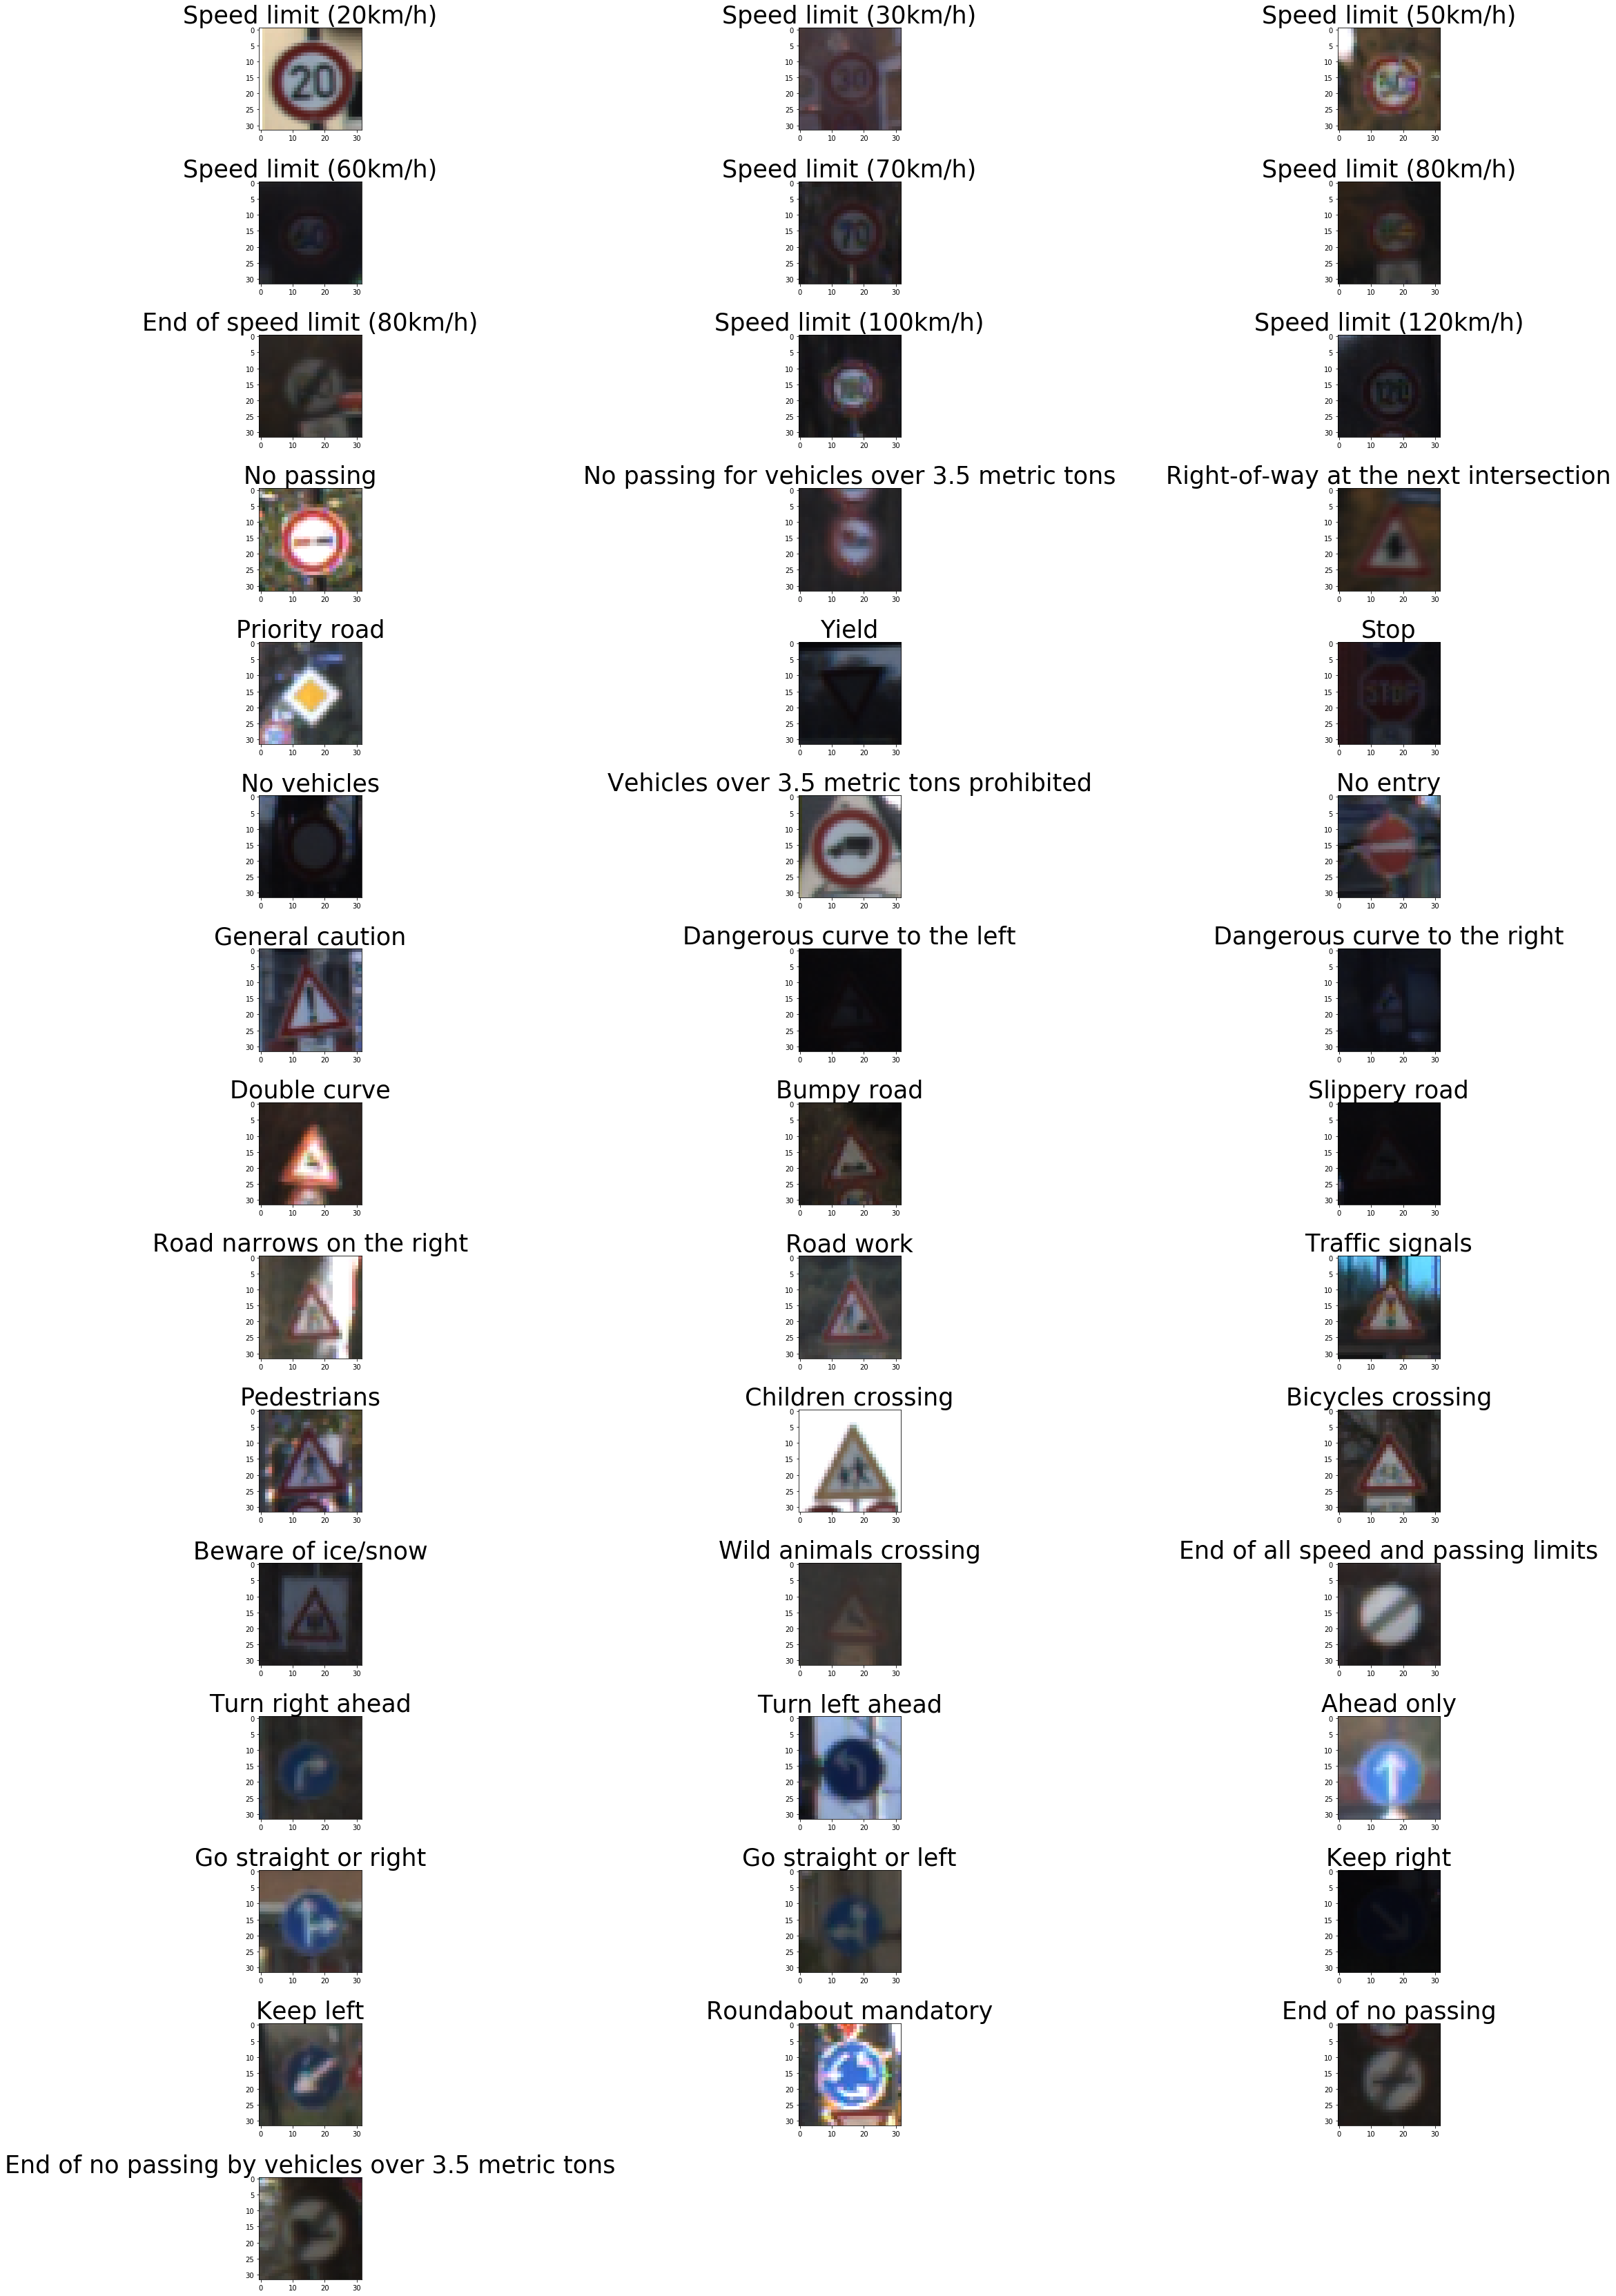

In [4]:
# increasing col, increases size of images in subplot. col = 60
fig = plt.figure(figsize=(35,60))
fig.subplots_adjust(hspace = 0.5, wspace = 1)
nrows = math.ceil(n_classes/3) # 15 rows
ncols = math.ceil(n_classes/15) # 3 columns
# 1. Image Gallery shows a nice distribution of images with titles
for i in range(n_classes):
    sub = fig.add_subplot(nrows, ncols, i + 1)
    image = X_train[indices[i]]
    title2 = "{}: {}".format(i, sign_dict[i])
    sub.set_title(sign_dict[i], size=35)
    sub.imshow(image, interpolation = 'nearest')

### Display Train Data Traffic Sign Counts

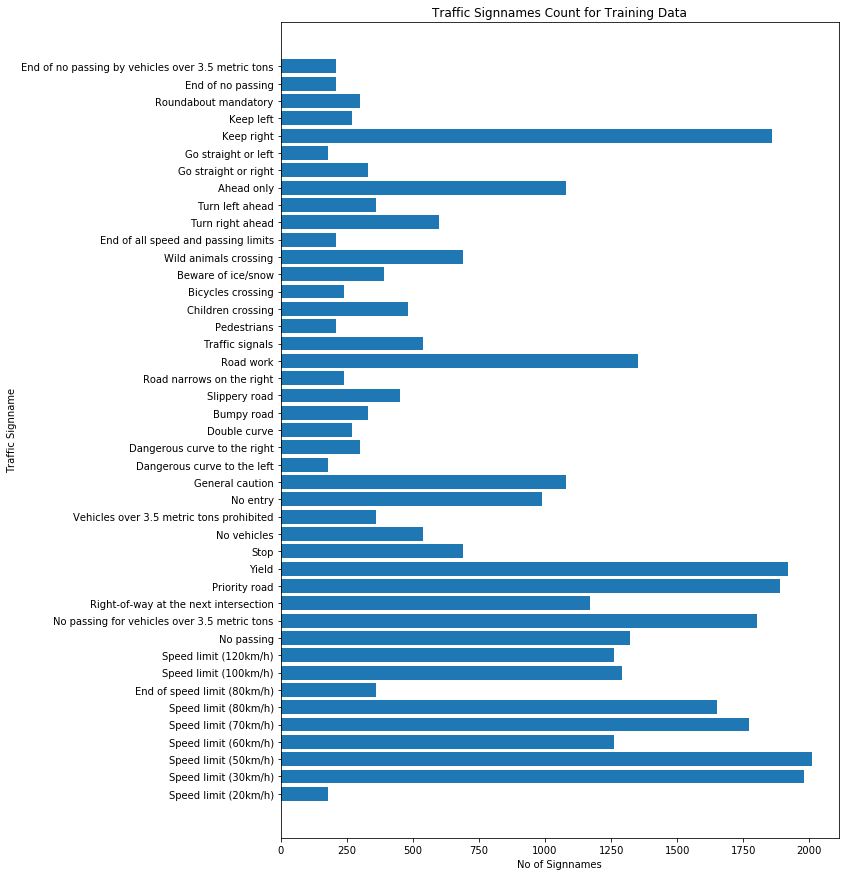

In [5]:
# 2. Display Distribution of the Data in Bar Graph(Train Dataset Sign Counts)
# Each bar is a unique traffic sign with the count of occurences of that sign
# print(sign_dict.values())
# print(classes)
# print(unique_counts)
plt.figure(figsize=(10,15))
plt.barh(classes, unique_counts)
plt.xlabel('No of Signnames', fontsize=10)
plt.ylabel('Traffic Signname', fontsize=10)
plt.yticks(classes, sign_dict.values(), fontsize=10)
plt.title('Traffic Signnames Count for Training Data')
plt.show()

### Display Valid Data Traffic Sign Counts

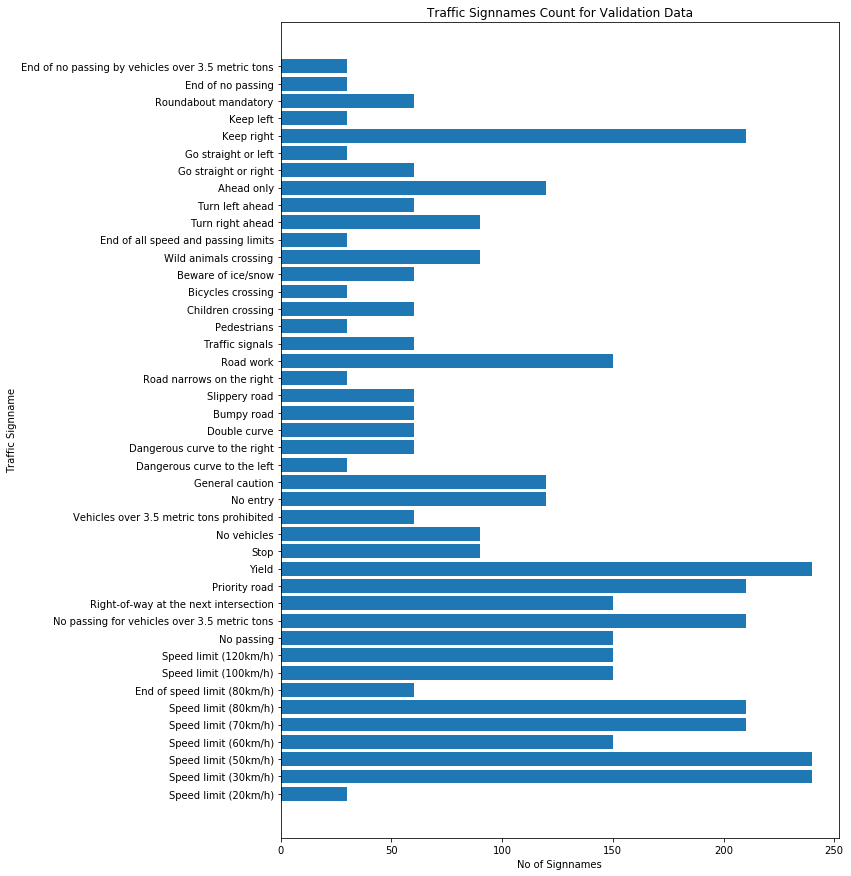

In [6]:
# 3. Display Valid Dataset Sign Counts in Distribution Bar Graph
plt.figure(figsize=(10,15))
plt.barh(classes, valid_unique_counts)
plt.xlabel('No of Signnames', fontsize=10)
plt.ylabel('Traffic Signname', fontsize=10)
plt.yticks(classes, sign_dict.values(), fontsize=10)
plt.title('Traffic Signnames Count for Validation Data')
plt.show()

### Display Test Data Traffic Sign Counts

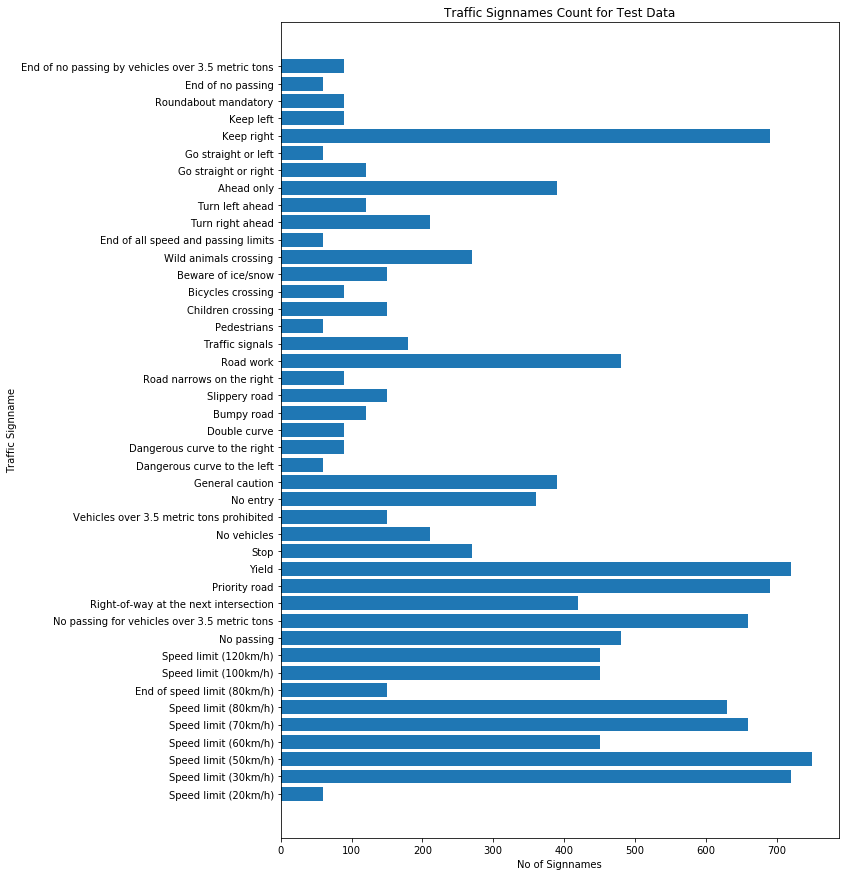

In [7]:
# 4. Display Test Dataset Sign Counts in Distribution Bar Graph
plt.figure(figsize=(10,15))
plt.barh(classes, test_unique_counts)
plt.xlabel('No of Signnames', fontsize=10)
plt.ylabel('Traffic Signname', fontsize=10)
plt.yticks(classes, sign_dict.values(), fontsize=10)
plt.title('Traffic Signnames Count for Test Data')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
import cv2
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# normalize images to ensure pixel values are between -0.5, 0.5
def normalize_images(images):
    norm_images = []
    for image in images:
        norm_img = (image / 255.0) - 0.5
        norm_images.append(norm_img)
    return norm_images

# data preprocessing done by tensorflow model normalization applied
X_train = normalize_images(X_train)
X_valid = normalize_images(X_valid)
X_test = normalize_images(X_test)


# The network has to recognize the object present in any orientation
def augment_data(images, labels):
    # initialize labels
    image_labels = []
    # initialize augmented data
    augmented_images = []
    # initialize rotate image parameters
    rotated_image = None
    (h, w) = images[0].shape[:2]
    center = (w/2, h/2)
    rot_angles = [-15, -10, -5, 5, 10, 15]
    scale = 1.0
    for image, label in zip(images, labels):
        # rotated image: loop 0 to 2 to save all rotation ops
        for rot_angle in rot_angles:
            # rotate image randomly: 15 to 270 degrees counterclockwise
            M = cv2.getRotationMatrix2D(center, rot_angle, scale)
            rotated_image = cv2.warpAffine(image, M, (w, h))
            augmented_images.append(rotated_image)
            image_labels.append(label) 
    return augmented_images, image_labels

# Replace existing training dataset with
augmented_data, augmented_labels = [], []
augmented_data, augmented_labels = augment_data(X_train, y_train)
X_train = augmented_data
n_aug_train = len(X_train)
print("Number of augmented training examples =", n_aug_train)
y_train = augmented_labels

Number of augmented training examples = 208794


In [9]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 64

from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob):   
    global conv1
    global conv2
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x64.
    # The formula for convolutions tell us:
    # out_h = (in_h - filter_h + 1)/strides[1]
    # out_w = (in_w - filter_w + 1)/strides[2]
    # this layer has a 3x3 filter with in_depth 3 and out_depth 12
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,3,64), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(64))
    # we use conv2d to convolve the filter over the imgs and add bias at end
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1,1,1,1], padding = 'VALID') + conv1_b

    # TODO: Activation.
    # we activate the conv1 of the convolutional layer with relu activation function
    conv1 = tf.nn.relu(conv1, name='conv1_relu')
    
    # TODO: Pooling. Input = 28x28x64. Output = 14x14x64.
    # we pool the conv1 using 2x2 kernel with 2x2 stride
    # filter size = 2x2
    # moves at stride of 2
    # out_h = (in_h - filter_h)/S + 1
    # out_w = (in_w - filter_w)/S + 1
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID', name='conv1_pool')
    
    # the network then runs through another set of convolutional, activation and pooling layers outputting 5x5x16
    
    # TODO: Layer 2: Convolutional. Output = 10x10x32.
    # use same hxw dimension as conv1
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,16,32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    # move at stride of 1
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding = 'VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2, name='conv2_relu')
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x32.
    # filter size = 2
    # moves at stride of 2
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID', name='conv2_pool')  
    
    # TODO: Flatten. Input = 5x5x32. Output = 800.
    # we flatten this output into a vector, the length of the vector =  5x5x16 = 400.
    fc0 = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 800. Output = 120.
    # we pass this vector into a fully connected layer with a width of 120
    # shape=(height, width)
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800,120), mean = mu, stddev = sigma))
    # tf.zeros(120) is 1D array with 120 elements that are 0
    fc1_b = tf.Variable(tf.zeros(120))
    # x*W + b
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    # then we apply relu to the output of the fc1
    fc1 = tf.nn.relu(fc1)

    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    # we repeat the fc again with width of 84
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    # x*W + b
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    # finally we attach a fc output layer with a width equal to the number of classes in our label set
    # in this case, we have 43 classes, one for traffic sign
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    # x*W + b
    # these outputs are also known as our logits, which is what we return from our lenet function
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [11]:
# set the batch of input imgs to none, which will allow the placeholder to later accept a batch of any size
# img dimensions are set to 32x32x1
# 1 because grayscale, if it was rgb, then 3
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
# y stores our labels, our labels come through as sparse variables, they are ints they aren't one hot encoded yet
y = tf.placeholder(tf.int32, (None))
# we use tf.one_hot function to one hot encode the labels
one_hot_y = tf.one_hot(y, 43)
# probability to keep units
keep_prob = tf.placeholder(tf.float32) 

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
# this is our training pipeline, you have to pass data into it for it to work

# we have another hyperparameter, learning rate tells tensorflow how quickly to update the networks weights
rate = 0.001
# we pass the input data to LeNet function to calculate our logits
logits = LeNet(x, keep_prob)
# we use the softmax cross entropy function to compare those logits to the ground truth labels
# and calculate the cross entropy. Cross entropy is a measure of how different the logits are
# from the ground truth labels
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
# The tf.reduce_mean function averages the cross entropy from all the training imgs
loss_operation = tf.reduce_mean(cross_entropy)
# Adam optimizer uses the Adam algorithm to minimize the loss function
# Similar to the stochastic gradient descent, Adam is a little more sophisticated than it
# this is where we use the learning rate hyperparameter set earlier
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
# finally we use minimize function on the optimizer, which uses backpropagation to update the network
# and minimize our training loss
training_operation = optimizer.minimize(loss_operation)

# Evaluate pipeline evaluates how good the model is

# the below two functions are the entire evaluation pipeline, but in order to run this
# evaluation pipeline, we have to build an evaluate function

# the first step in this pipeline is to measure whether a given prediction is correct
# by comparing the logit prediction to the one hot encoded ground truth label
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# the second step is to calculate the model's overall accuracy by averaging the individual
# prediction accuracies
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# this function takes a dataset as input, sets some initial variables
# then batches the dataset and runs it through the evaluation pipeline
# the evaluate function averages the accuracy of each batch to calculate the total
# accuracy of the model
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# now everything is setup, we can build a function to train and evaluate our model
# first we create the tensorflow session and initialize the variables
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    # we train over whatever number has been set in the EPOCHS hyperparameter
    print("Training...")
    print()
    for i in range(EPOCHS):
        # at the beginning of each EPOCH, we shuffle our training data to ensure that our training isn't bias
        # by the order of the imgs
        X_train, y_train = shuffle(X_train, y_train)
        # then we break our training data into batches and train the model on each batch
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            # keep_prob = 0.5, accuracy = 94%
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        # at the end of each EPOCH, we evaluate the model on our training data
        train_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))           
            
        # at the end of each EPOCH, we evaluate the model on our validation data
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    # once we have completely trained the model we save it that way we can load it up later and modify it
    # or evaluate the model on our test dataset
    saver.save(sess, './lenet_model')
    print("Model saved")

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Training...

EPOCH 1 ...
Train Accuracy = 0.972
Validation Accuracy = 0.949

EPOCH 2 ...
Train Accuracy = 0.988
Validation Accuracy = 0.956

EPOCH 3 ...
Train Accuracy = 0.994
Validation Accuracy = 0.957

EPOCH 4 ...
Train Accuracy = 0.995
Validation Accuracy = 0.967

EPOCH 5 ...
Train Accuracy = 0.996
Validation Accuracy = 0.973

EPOCH 6 ...
Train Accuracy = 0.996
Validation Accuracy = 0.968

EPOCH 7 ...
Train Accuracy = 0.995
Validation Accuracy = 0.965

EPOCH 8 ...
Train Accuracy = 0.998
Validation Accuracy = 0.979

EPOCH 9 ...
Train Accuracy = 0.997
Validation Accuracy = 0.974

EPOCH 10 ...
Train Accuracy = 0.997
Validati

In [13]:
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# we evaluate the model on our test dataset
# we should only run the model on the test dataset one time once we are completely done with training
# otherwise we would use the test dataset to choose the best model and then the test dataset wouldn't
# provide a good estimate of how well the model would do in the real world

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from .\lenet_model
Test Accuracy = 0.965


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

assets/data/images/web_gts\50km_speed_limit.jpg
50km_speed_limit.jpg
assets/data/images/web_gts\children_crossing.jpeg
children_crossing.jpeg
assets/data/images/web_gts\no_entry.jpg
no_entry.jpg
assets/data/images/web_gts\priority_road.jpg
priority_road.jpg
assets/data/images/web_gts\road_work.jpg
road_work.jpg
uint8
uint8
uint8
uint8
uint8


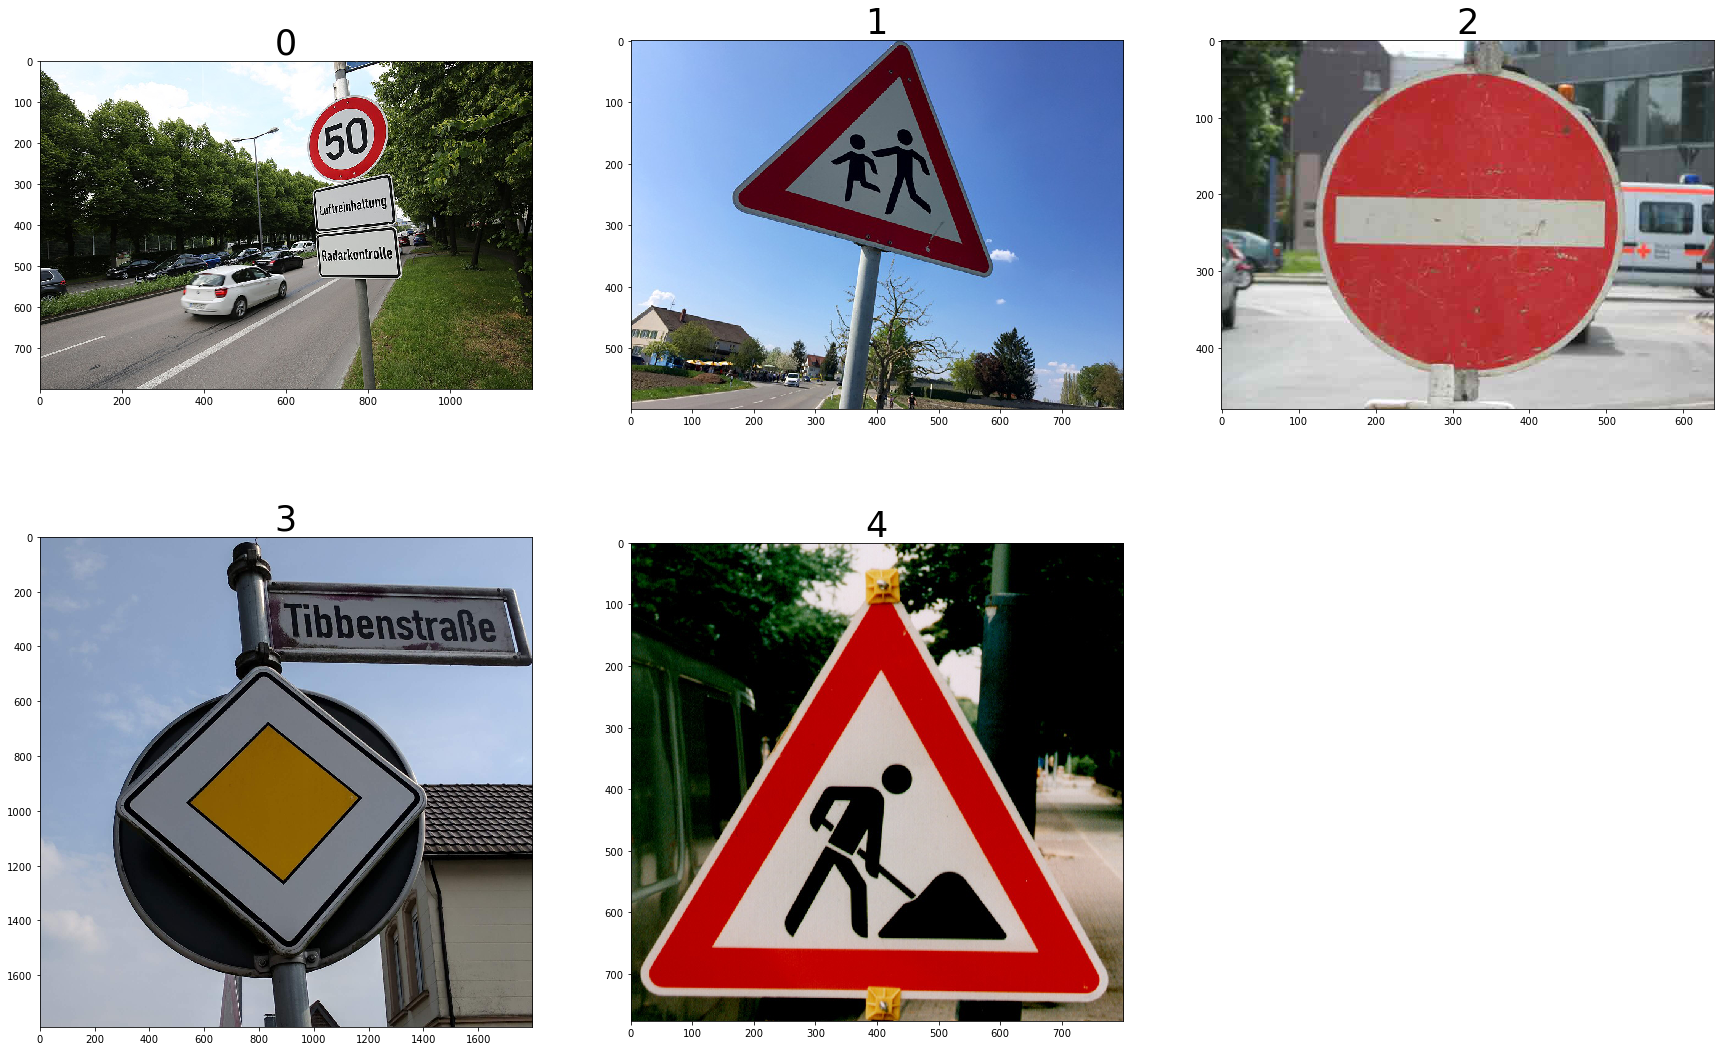

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import sys
import glob
import matplotlib.image as mpimg

# Download at least 5 pictures of German traffic signs from the web
# Street view of germany in google maps
X_test_web = []
filenames = []
files = glob.glob('assets/data/images/web_gts/*')
for file in files:
    print(file)
    if sys.platform == 'win32':
        filename = file.split('\\')[-1]
    elif sys.platform == 'linux':
        filename = file.split('/')[-1]
    print(filename)
    filenames.append(filename)
    image = mpimg.imread(file)
    X_test_web.append(image)

n_web_images = len(X_test_web)

# increasing col, increases size of images in subplot. col = 60
fig = plt.figure(figsize=(30,20))
fig.subplots_adjust(hspace = 0.05, wspace = 0.2)
nrows = math.ceil(n_web_images/3) # 2 rows
ncols = math.ceil(n_web_images/2) # 3 columns
# 1. Image Gallery shows a nice distribution of web images
for i in range(n_web_images):
    sub = fig.add_subplot(nrows, ncols, i + 1)
    image = X_test_web[i]
    print(image.dtype)
    sub.set_title(i, size=35)
    sub.imshow(image, interpolation = 'nearest')

### Preprocess Web Image Scale to 32x32

(32, 32, 3)
uint8
uint8
uint8
uint8
uint8


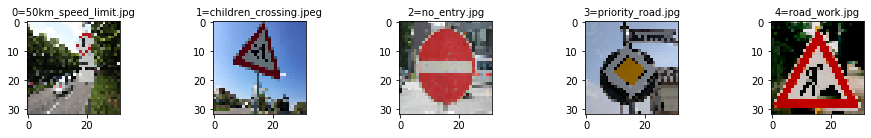

In [15]:
img_size = 32

# Scale web images 32x32x3
def scale_images(images, image_size):
    resize_images = []
    for image in images:
        resize_image = cv2.resize(image, (image_size, image_size))
        resize_images.append(resize_image)
    return resize_images

# preprocess to the size our network needs
X_test_web_orig = list(X_test_web)
X_test_web = scale_images(X_test_web, img_size)

print(X_test_web[0].shape)

# increasing width, increases spacing between images in each row
# increasing row, increases spacing between images in each column
# width, height
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace = 0.05, wspace = 1)
# fig.subplots_adjust(hspace = 0.5, wspace = 1)
nrows = math.ceil(n_web_images/5) # 1 row
ncols = math.ceil(n_web_images/1) # 5 columns
# 1. Image Gallery shows a nice distribution of web images
for i in range(n_web_images):
    sub = fig.add_subplot(nrows, ncols, i + 1)
    image = X_test_web[i]
    print(image.dtype)
    sub.set_title(str(i) + '=' + filenames[i], size=10)
    sub.imshow(image, interpolation = 'nearest')

### Normalize Images, Ensure Pixel [-0.5,0.5]

In [16]:
# data preprocessing done by tensorflow model normalization applied
X_test_web = normalize_images(X_test_web)

# Predict the Sign Type for Each Image

In [17]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
prediction = tf.argmax(logits, 1)

# def predict(X_data):
#     num_examples = len(X_data)
#     prediction = 0.0
#     sess = tf.get_default_session()
#     for offset in range(0, num_examples, BATCH_SIZE):
#         batch_x = X_data[offset:offset+BATCH_SIZE]
#         prediction = sess.run(prediction_operation, feed_dict={x: batch_x, keep_prob: 1.0})
#         print("img name: %s, prediction: %.3f" %(files[offset], prediction))

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(prediction, feed_dict={x: X_test_web, keep_prob: 1.0})
    
print("\nLogits Prediction Result:")
for p_i in predictions:
    print("prediction = %d, sign name = %s" %(p_i, sign_dict[p_i]))


INFO:tensorflow:Restoring parameters from .\lenet_model

Logits Prediction Result:
prediction = 20, sign name = Dangerous curve to the right
prediction = 12, sign name = Priority road
prediction = 17, sign name = No entry
prediction = 12, sign name = Priority road
prediction = 25, sign name = Road work


### Analyze Performance

In [18]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
# accuracy = # correct / total images
# extract class ID: sign name as key:value pair into dictionary
web_sign_dict = {}
with open("assets/data/images/web_signnames.csv") as signnames_file:
    reader = csv.reader(signnames_file)
    # Skip the first row of the csv file
    next(reader)    
    for rows in reader:
        web_sign_dict[int(rows[1])] = rows[2]
# print(web_sign_dict)

web_sign_label = list(web_sign_dict.keys())
# total number of correct predictions
sum = 0
# CNN model's accuracy for classifying 5 traffic sign images
accuracy = 0

for i in range(n_web_images):
    if web_sign_label[i] == predictions[i]:
        sum += 1
accuracy = sum/n_web_images
print("Web Test Accuracy = %.2f" %(accuracy))

Web Test Accuracy = 0.60


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from .\lenet_model

Top 5 Softmax Probabilities For Each Image:


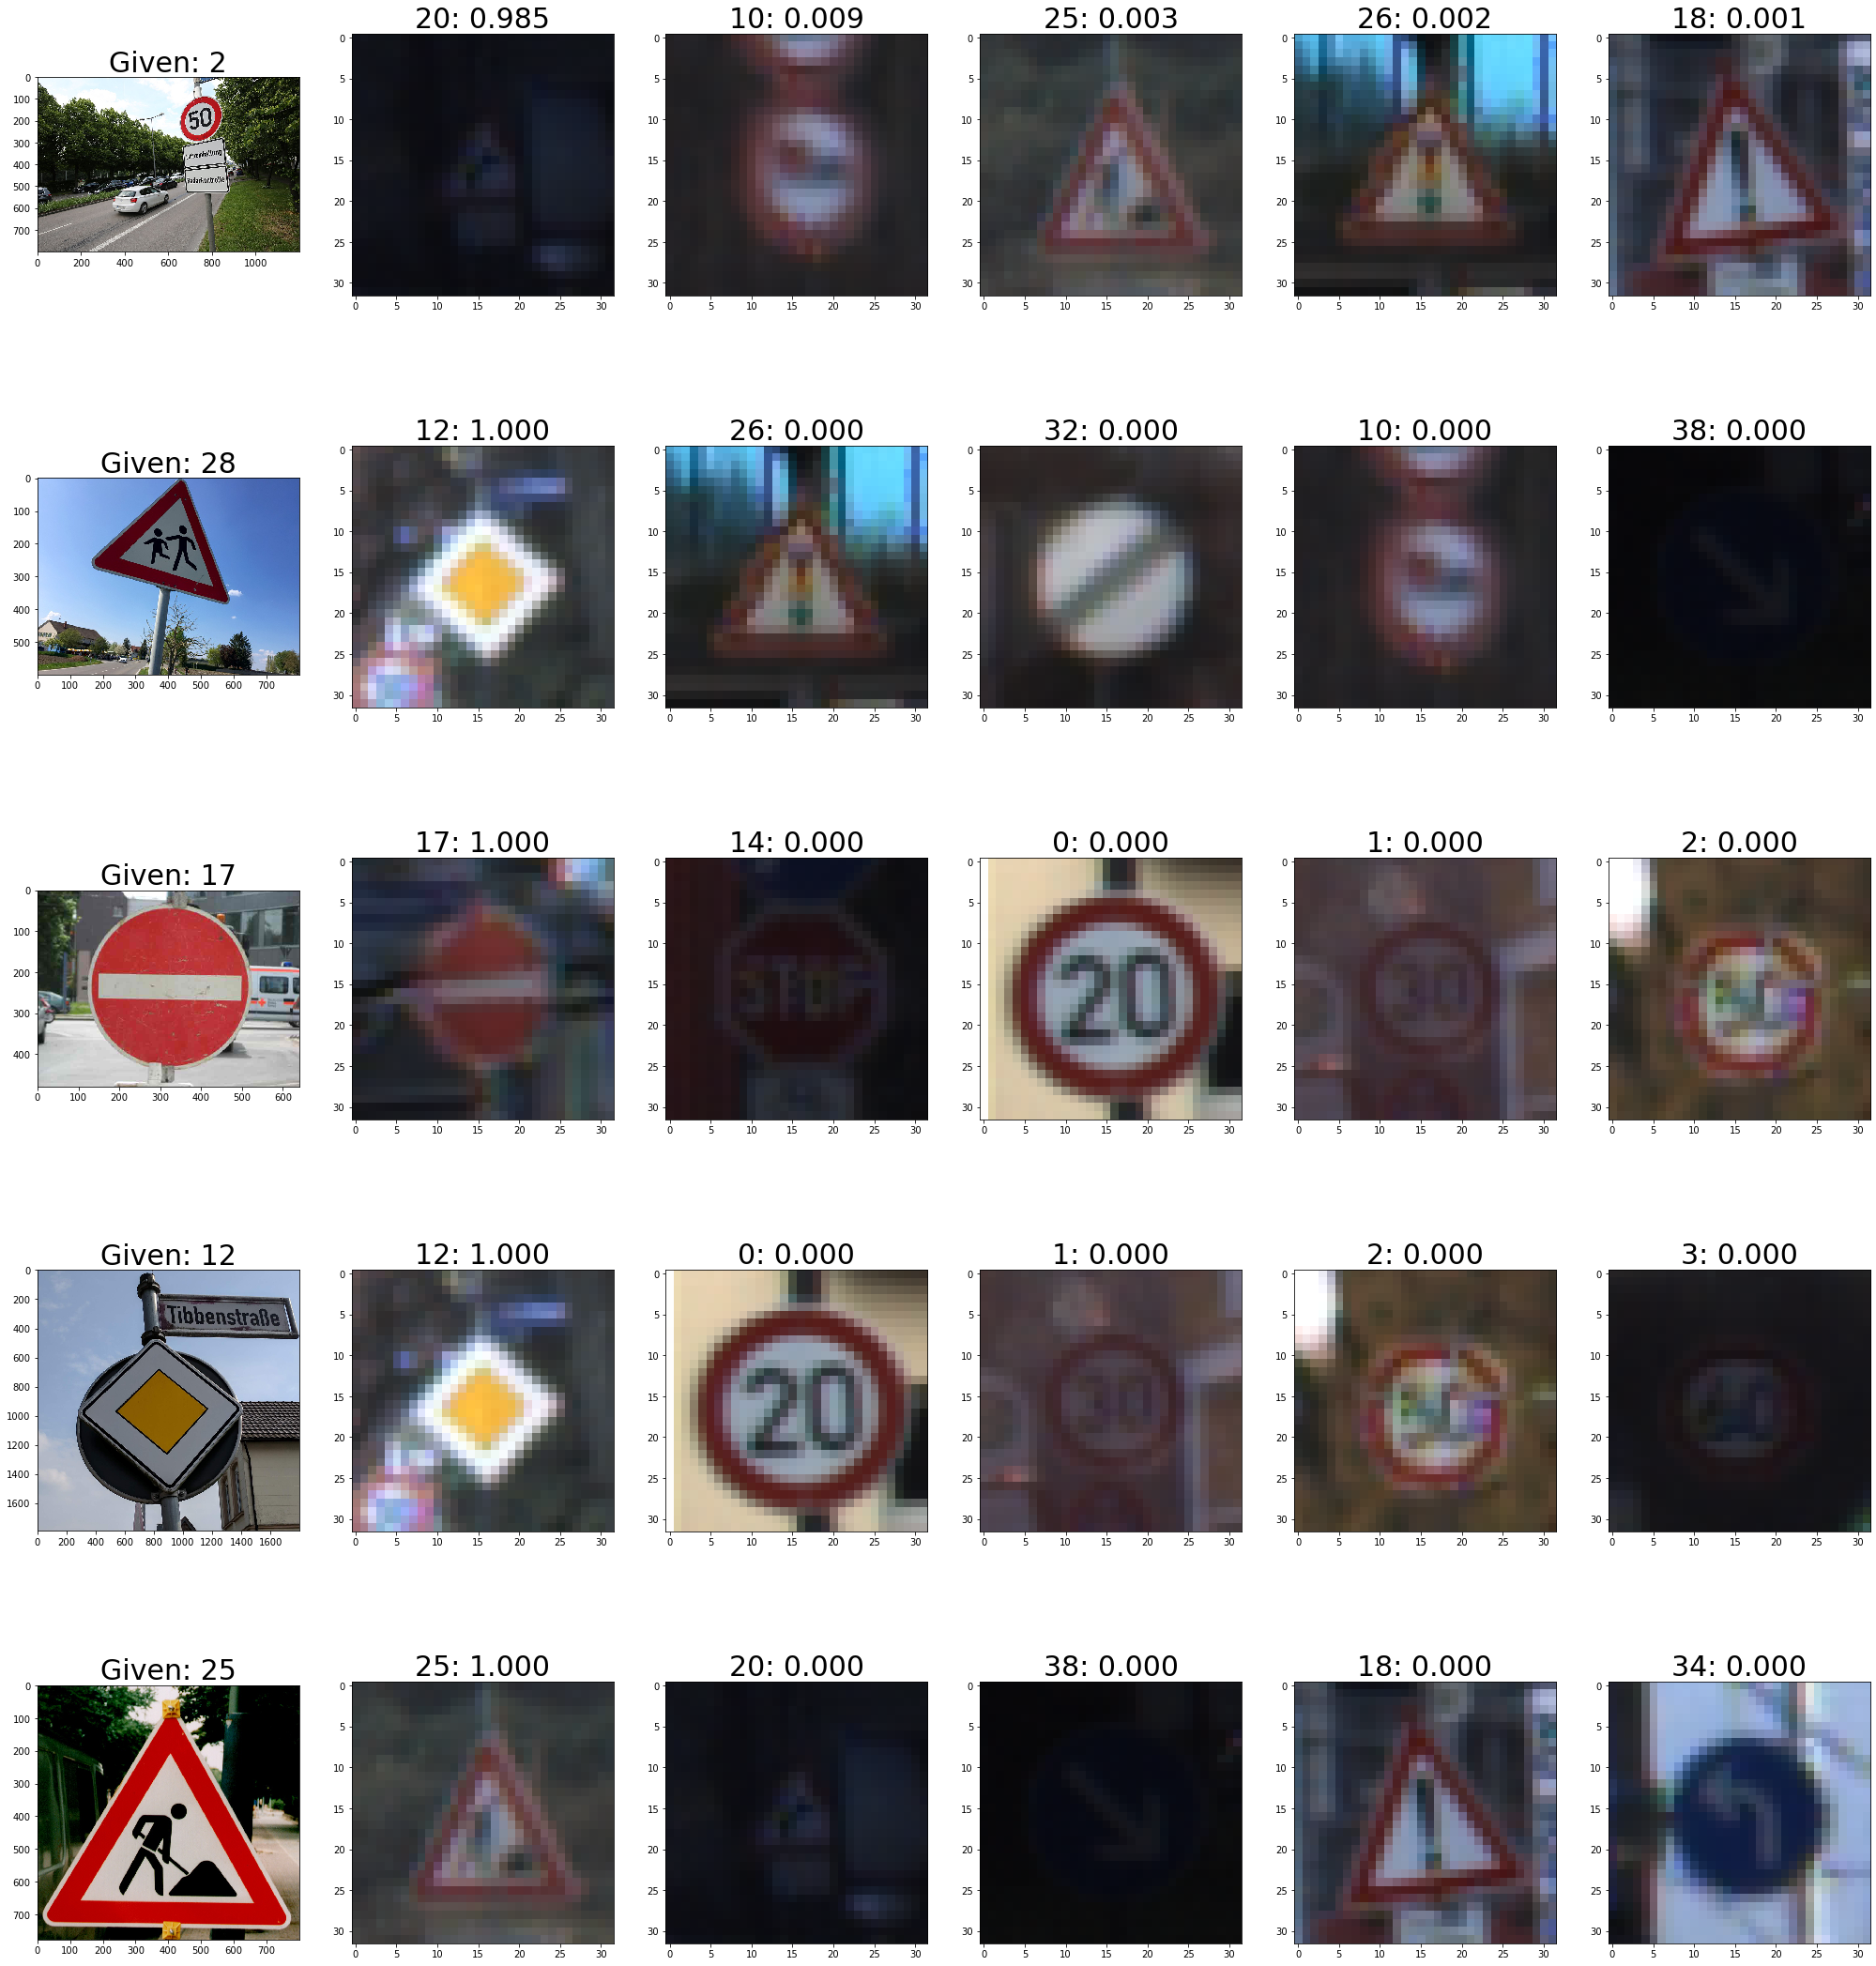

In [19]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top5_kv = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), {x: X_test_web, keep_prob: 1.0})
    
# Web Image Gallery shows a Top 5 Softmax Probabilities    
top5_pred_list, top5_classIds_list = top5_kv
print("\nTop 5 Softmax Probabilities For Each Image:")
nrows = 5 # 5 rows
ncols = 6 # 6 columns
fig, axs = plt.subplots(nrows, ncols,figsize=(35,40))
fig.subplots_adjust(hspace = 0.05, wspace = 0.2)
for i in range(len(X_test_web_orig)):
    classIds = top5_classIds_list[i]
    preds = top5_pred_list[i]
    given_image = X_test_web_orig[i]
    j = 0
#     print(given_image.dtype)
    axs[i, j].imshow(given_image)
    title1 = "Given: {}".format(web_sign_label[i])
    axs[i, j].set_title(title1, size=30)
    for j in range(1, len(classIds)+1):
        pred_image = X_train_orig[indices[classIds[j-1]]]
        axs[i, j].imshow(pred_image)
        title2 = "{}: {:.3f}".format(classIds[j-1], preds[j-1])
        axs[i, j].set_title(title2, size=30)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


INFO:tensorflow:Restoring parameters from .\lenet_model
Convolution Layer 1: 64 Features
Convolution Layer 2: 32 Features


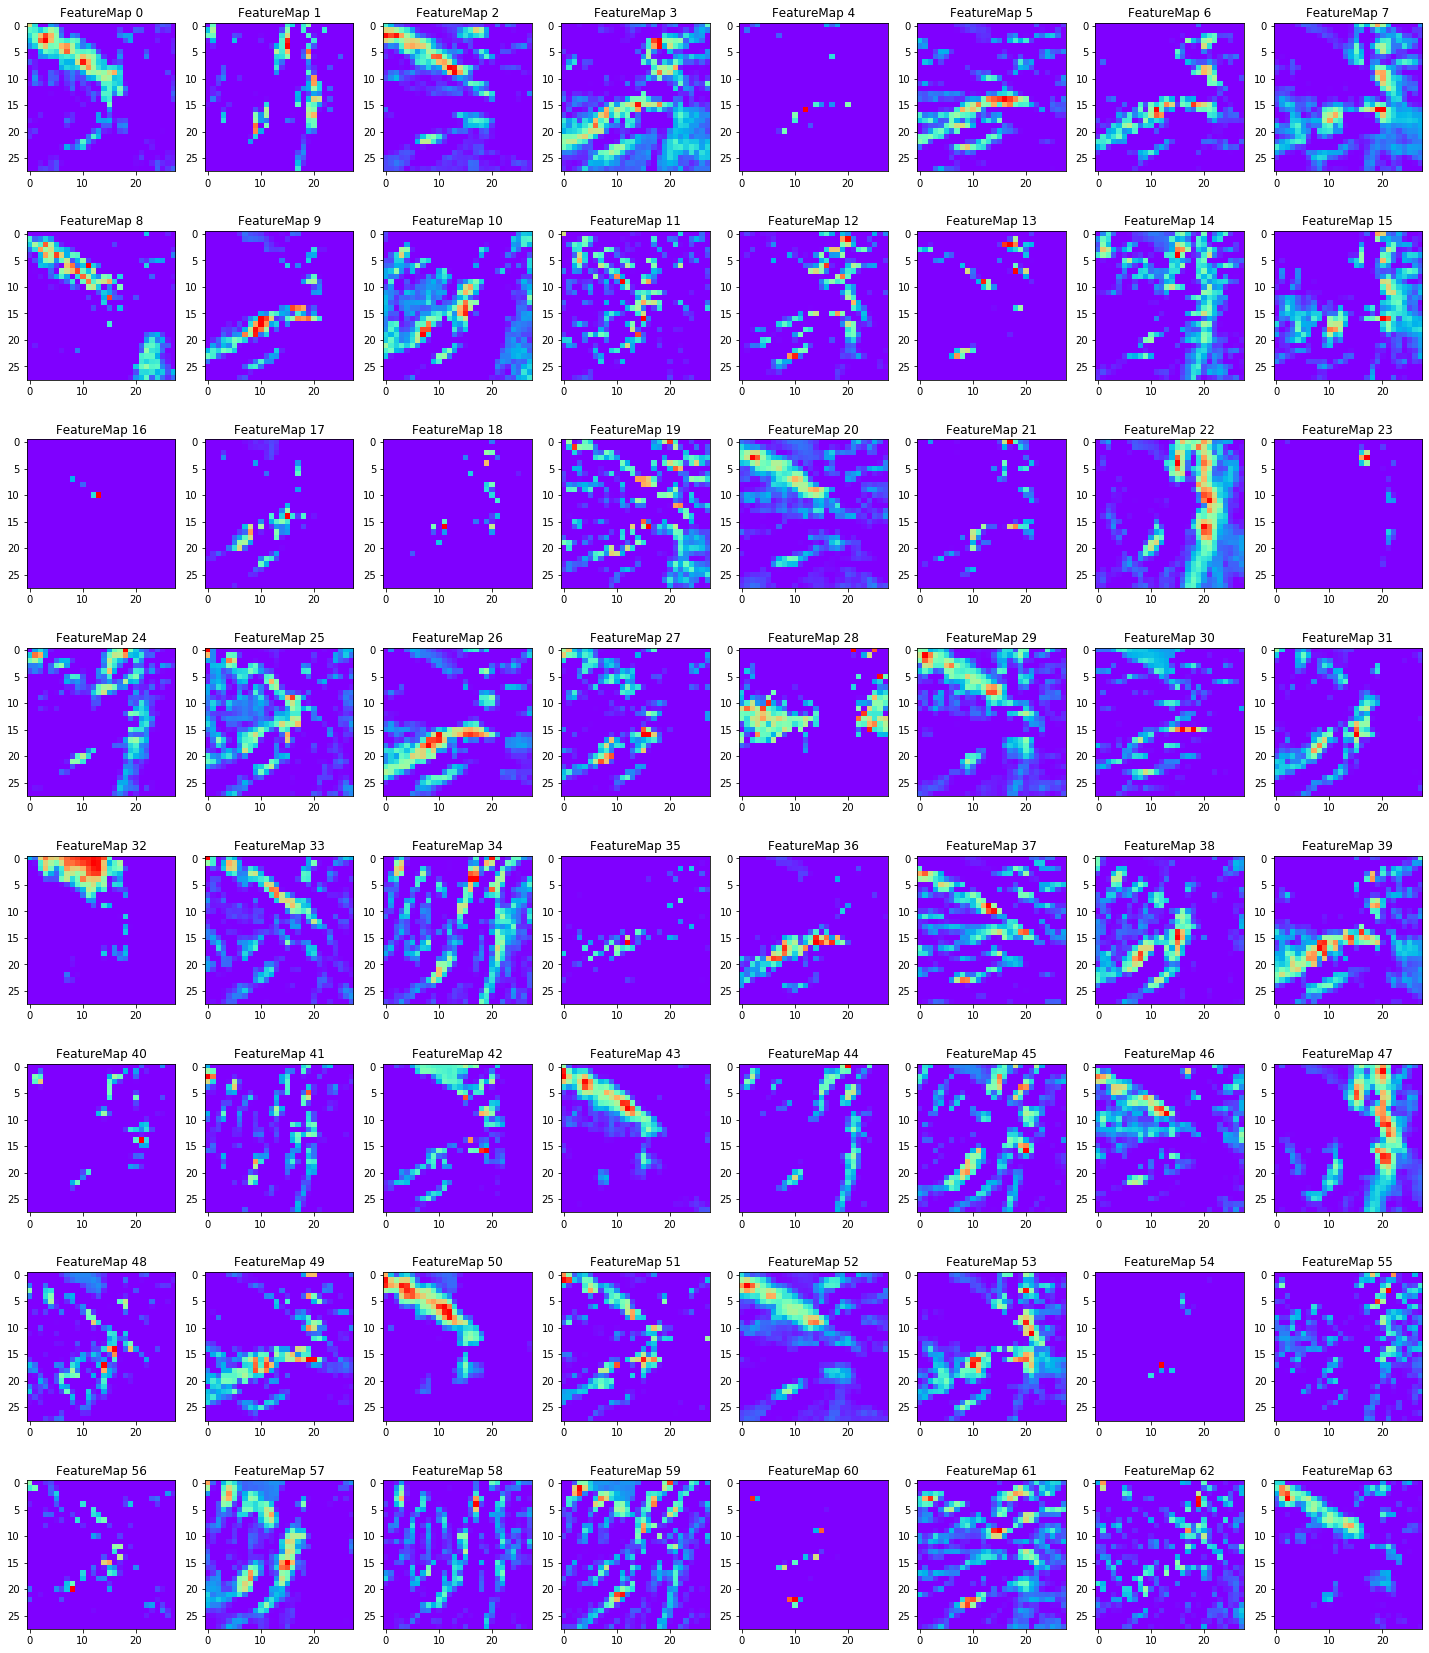

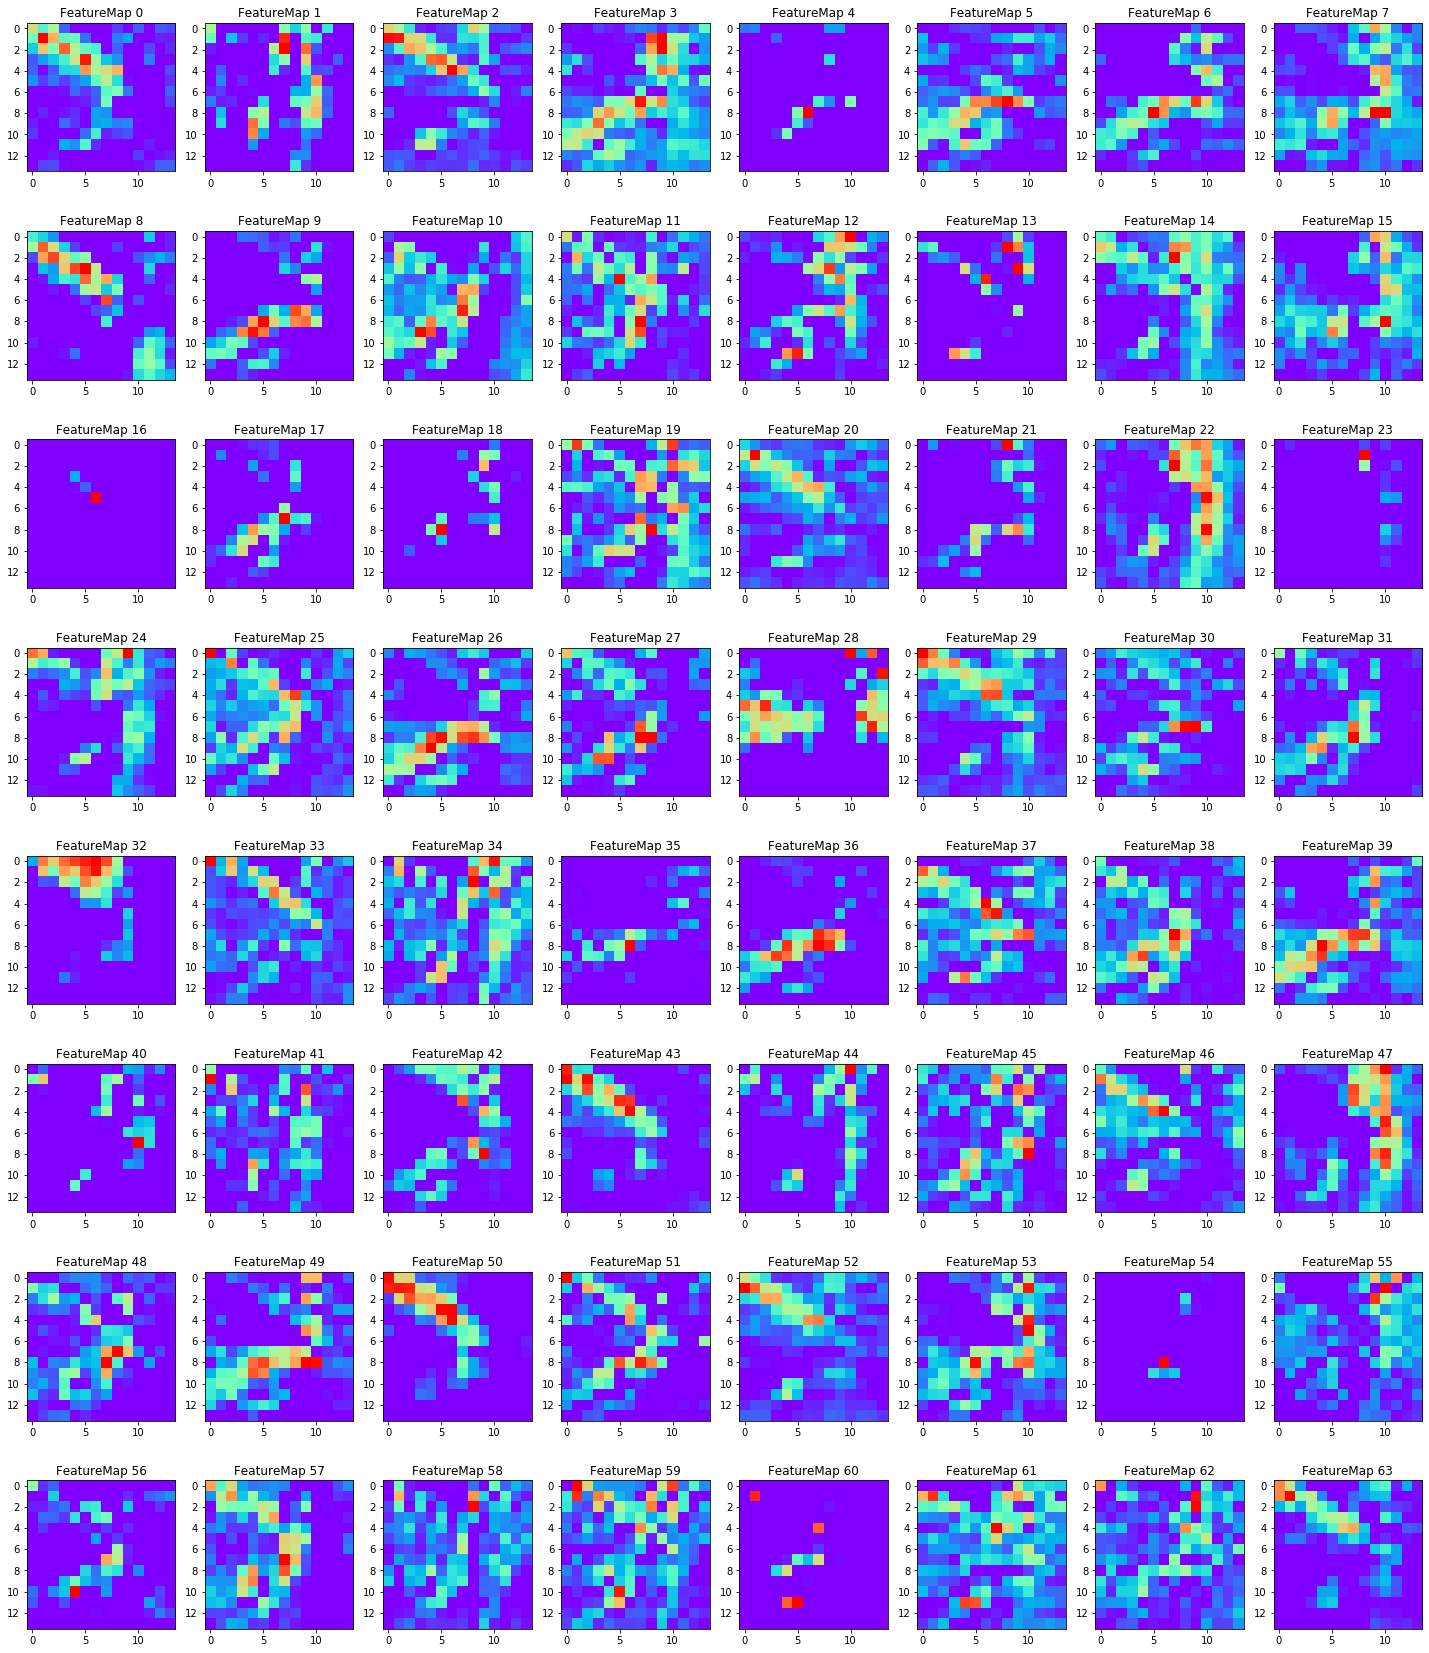

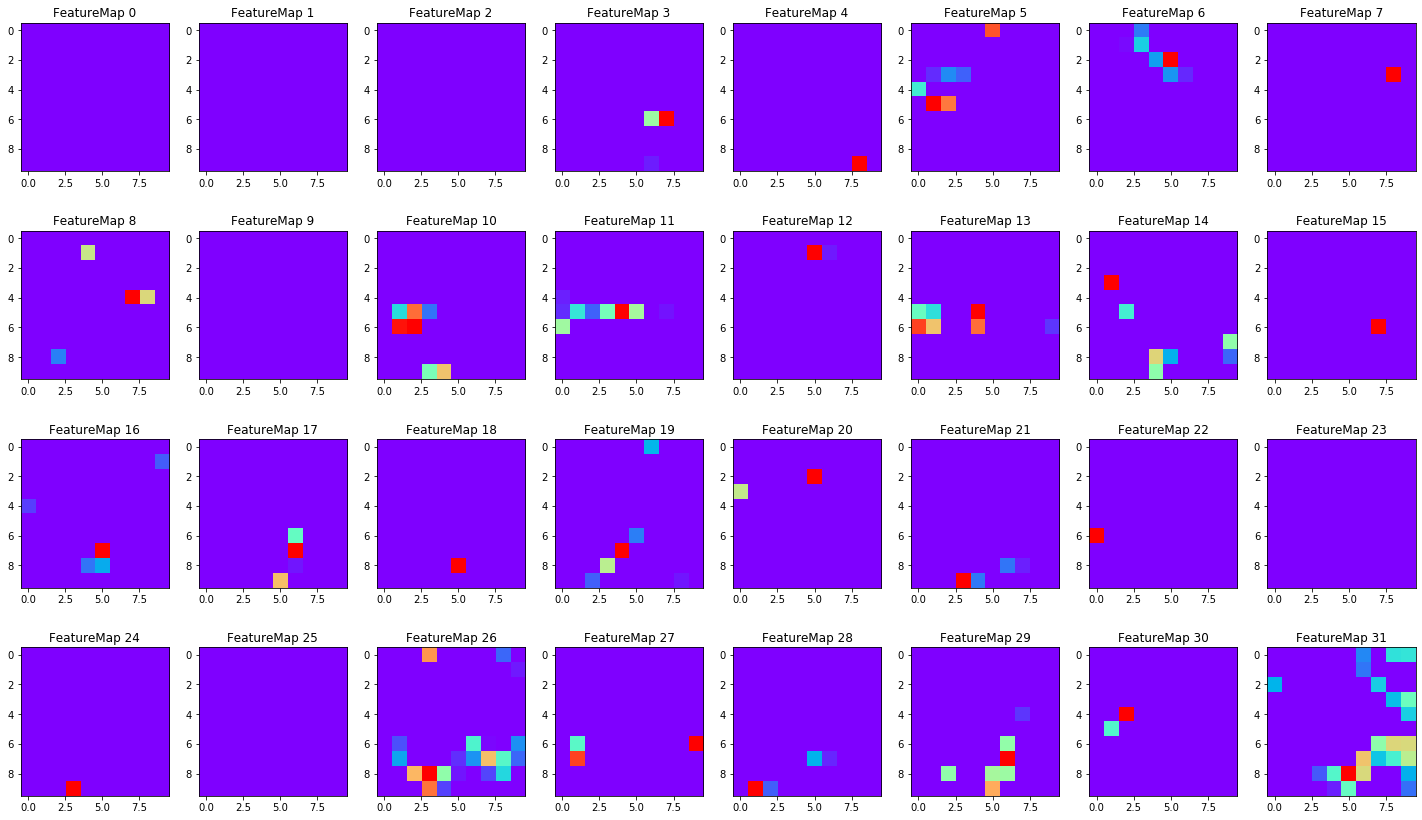

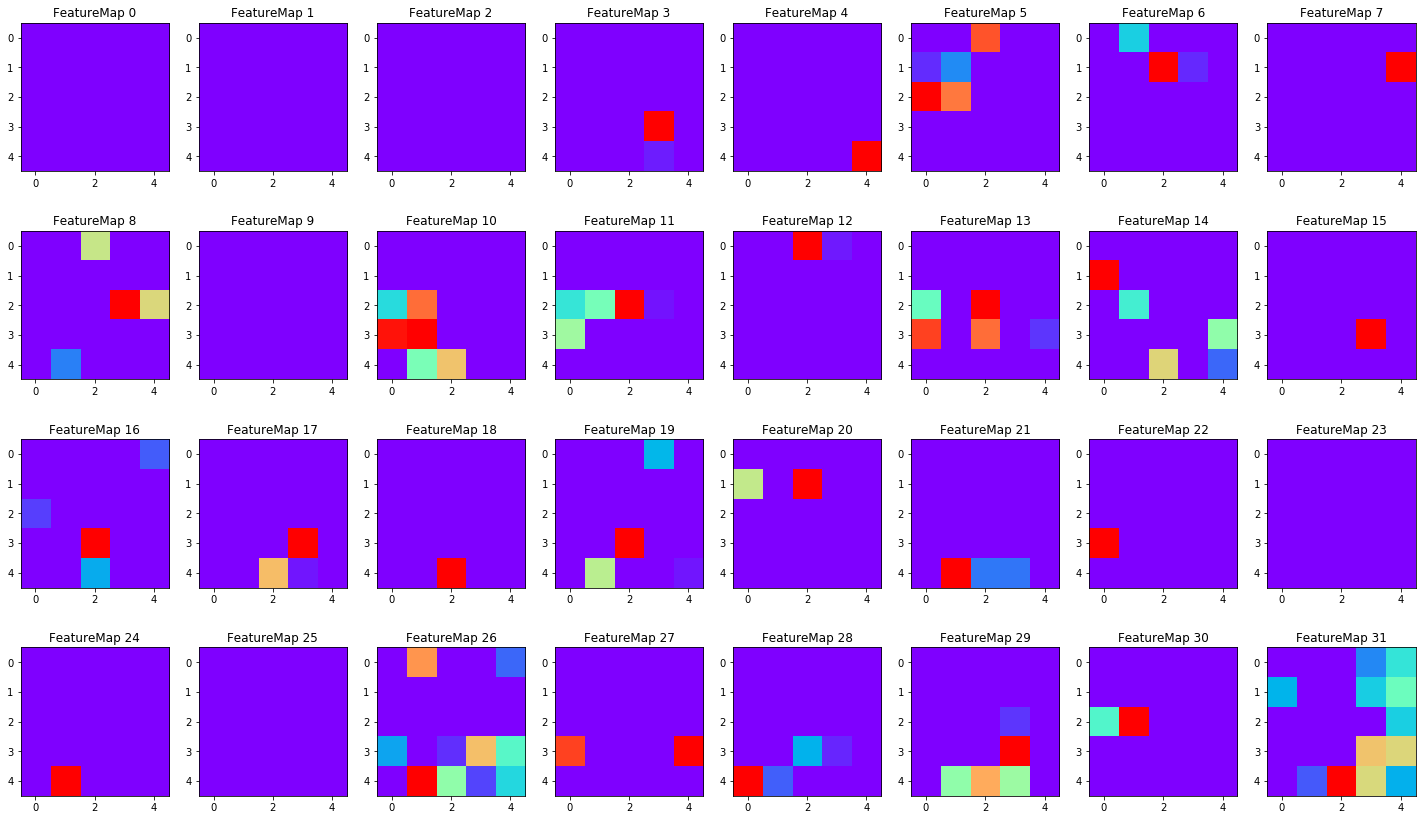

In [20]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# feature_depth: each layer has a number of features for each feature map that it outputs known as the depth
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(25,30))
    for featuremap in range(featuremaps):
        plt.subplot(8,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="rainbow")
            
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("Convolution Layer 1: 64 Features")
    print("Convolution Layer 2: 32 Features")
    conv1_relu = sess.graph.get_tensor_by_name('conv1_relu:0')
    outputFeatureMap(X_test_web, conv1_relu, plt_num=1)
    
    conv1_pool = sess.graph.get_tensor_by_name('conv1_pool:0')
    outputFeatureMap(X_test_web, conv1_pool, plt_num=2)

    conv2_relu = sess.graph.get_tensor_by_name('conv2_relu:0')
    outputFeatureMap(X_test_web, conv2_relu, plt_num=3)
    
    conv2_pool = sess.graph.get_tensor_by_name('conv2_pool:0')
    outputFeatureMap(X_test_web, conv2_pool, plt_num=4)    
    